<a href="https://colab.research.google.com/github/sikora-toma/gym-pendulum-control/blob/main/pendulum_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [2]:
env = gym.make('Pendulum-v1')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [3]:
env.observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [8]:
!pip install pyvirtualdisplay PyOpenGL PyOpenGL-accelerate
!pip install gym[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 40.0 MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp37-cp37m-linux_x86_64.whl size=1599506 sha256=254bdacc03d90821c8195c176954fcb78ab3fa2ea456c933a1cbcd7b8de84b45
  Stored in directory: /root/.cache/pip/wheels/1c/f5/6f/169afb3f2d476c5e807f8515b3c9bc9b819c3962316aa804eb
Successfully built PyOpenGL-accelerate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 33.1 MB/s 
     |████████████████████████████████| 1.8 MB 70.0 MB/s 
     |████████████████████████████████| 2.1 MB 38.0 MB/s 
     |████████████████████████████████| 3.4 MB 66.4 MB/s 
     |████████████████████████████████| 2.4 MB 49.7 MB/s 
     |████████████████████████████████| 1.6 MB 38.0 MB/s 
     |████████████████████████████████| 3.5 MB 70.2 MB/s 
   

In [10]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  freeglut3
Suggested packages:
  libgle3
The following NEW packages will be installed:
  freeglut3 python-opengl
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 570 kB of archives.
After this operation, 5,733 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 570 kB in 0s (4,844 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:a

In [11]:
from math import atan2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
cos, sin, v = env.reset()

In [13]:
atan2(sin, cos)

0.4590932812309498

/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


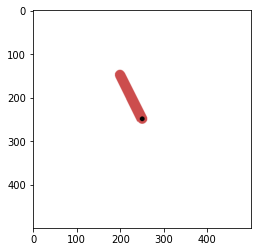

In [14]:
plt.imshow(env.render('rgb_array'))

In [29]:
def get_action_np(obs):
  return get_action(obs[0], obs[1], obs[2])

def get_action(cos, sin, v):
  P = 10
  D = 2
  angle = atan2(sin, cos)
  torque = -P*angle - D * v
  return np.array([torque])

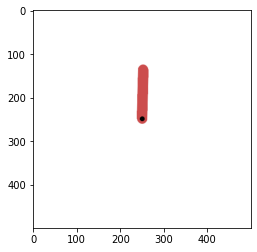

In [41]:
env = gym.make('Pendulum-v1')
obs = env.reset(options={'x_init':2, 'y_init':0})
img = plt.imshow(env.render('rgb_array')) # only call this once
for _ in range(50):
    img.set_data(env.render('rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = get_action_np(obs)#env.action_space.sample()
    obs, _, _, _ = env.step(action)

In [ ]:
cos, sin, v = env.reset()
print(atan2(cos, sin)*180/3.14-90, get_action(cos, sin, v))

30.58084753263583 [0.53266957]


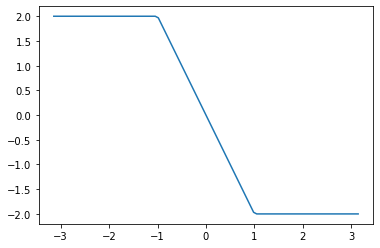

In [ ]:
x = np.linspace(-2, 2, 100)
y = x ** 2
plt.plot(np.linspace(-np.pi, np.pi, 100), [get_action(np.cos(i), np.sin(i), 0) for i in np.linspace(-np.pi, np.pi, 100)])